In [27]:
import pandas as pd

In [28]:
b_name=pd.read_csv(r'C:\Users\ADMIN\Downloads\sm\project\2 Analyzing Naming Trends\names/yob1880.txt',names=['name','sex','birth'])

In [29]:
b_name.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [30]:
b_name.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

In [31]:
years=range(1880,2023)
arr=[]
columns=['name','sex','birth']
for year in years:
    path=r'C:\Users\ADMIN\Downloads\sm\project\2 Analyzing Naming Trends\names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    arr.append(frame)

name=pd.concat(arr,ignore_index=True)
name.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [32]:
total_birth=name.pivot_table('birth',index='year',columns='sex',aggfunc=sum)
total_birth

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


<Axes: title={'center': 'Total Birth by sex and year'}, xlabel='year'>

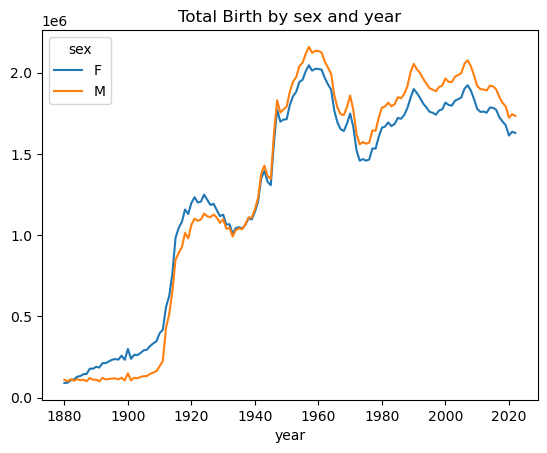

In [33]:
total_birth.plot(title='Total Birth by sex and year')

In [34]:
def add_pname(popular_name):
    popular_name['popular_name']=((popular_name.birth/popular_name.birth.sum())*100)
    return popular_name

name=name.groupby(['year','sex']).apply(add_pname)
name
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16064\1878899046.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  name=name.groupby(['year','sex']).apply(add_pname)


,name,sex,birth,year,popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000288
2085154,Zydn,M,5,2022,0.000288
2085155,Zylon,M,5,2022,0.000288
2085156,Zymeer,M,5,2022,0.000288


In [35]:
def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [36]:
boy_name = top_100[top_100.sex == 'M']
girl_name = top_100[top_100.sex == 'F']
total_birth = top_100.pivot_table('birth', index = 'year', columns = 'name', aggfunc = sum)

In [37]:
boy_name.head()

,name,sex,birth,year,popular_name
35851,Ab,M,5,1880,0.004525
35852,Gerasimos,M,5,2003,0.000253
35853,Gejuan,M,5,2003,0.000253
35854,Gedalya,M,5,2003,0.000253
35855,Gaylen,M,5,2003,0.000253


In [39]:
girl_name.head()

,name,sex,birth,year,popular_name
0,Adelle,F,5,1880,0.005495
1,Kadesha,F,5,2001,0.000278
2,Justene,F,5,2001,0.000278
3,Jylene,F,5,2001,0.000278
4,Jylissa,F,5,2001,0.000278
